# Conjunto de entrenamiento y testing

![datos test y entrenamiento](../Recursos/imgs/data-test.PNG)

Recuerdas los datos de entrenamiento que usaste en un tu primer modelo de _"Arbol de decisiones"_ . Bueno a ello nos referimos exactamente cuando hablamos de datos de entrenamiento y test.

Un **segmento de ellos se usa para entrenar** a la maquina y otro no se le muestra, seran los datos de **test o prueba de efectividad**

Generalmente se toma entre el 75% y 85% de los datos para entrenarse

#### **Puede haber problema con ello?**
Claro que **si**, cuando usamos datos que no estan bien distribuidos o "barajados", mezclados podemos cometer errores en la enseñanza solo mostrandole a la maquina por ejemplo los primeros valores y diferentes a los valores finales

Por eso debemos seleccionar un metodo **aleatorio** para separar los datos y seleccionarlos **¡Vamos por ello!**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
len(data)#verificamos cuantos datos tenemos

3333

## Forma 1 para partir los datos: Dividir utilizando distribucion normal

In [9]:
#crearemos un vector de la misma longitud de mi dataset (3333)
a = np.random.randn(len(data))

(array([  9.,  65., 266., 517., 797., 782., 565., 242.,  69.,  21.]),
 array([-3.23158553, -2.58336347, -1.93514142, -1.28691936, -0.63869731,
         0.00952475,  0.6577468 ,  1.30596886,  1.95419091,  2.60241297,
         3.25063502]),
 <a list of 10 Patch objects>)

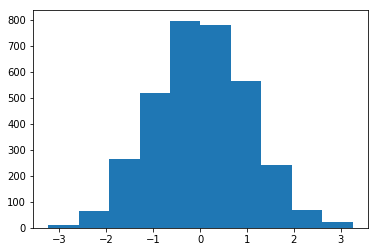

In [14]:
plt.hist(a)#datos distribuidos de manera normal

vamos a chechar el dataset y revisar que valores son menores que 0.75% en la distribucion

In [33]:
check = (a<0.75)
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 792.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2541.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

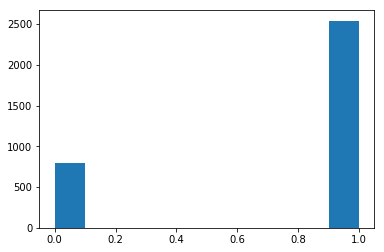

In [35]:
plt.hist(np.uint8(check))#antes debo convertir ese dato boolean en uint8 propio de numpy

Como resultado de probar que datos **DISTRIBUIDOS** (en el grafico) SON MENORES a 0.8 tengo que el 80% es mayor a 0.8 y el resto menor

**vamos a partir ahora los datos** entre los que cumplen la condicion y los que no

In [36]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [38]:
training = data[check]#cumple la condicion de check
test = data[~check]#NO cumple la condicion (ALT + 126)

In [39]:
len(training) #75% de los datos

2541

In [41]:
len(test) #25% de los datos

792

Listo! ya tenemos nuestro primer conjunto de datos

## Forma 2 para partir los datos: **Con Sklearn** (mas cool)

Recuerda que usaste sklearn en tu primer arbol de decision mientras estudiaste IA. (Problema de la flor iris)

In [48]:
from sklearn.model_selection import train_test_split #lib para partir los datos
import sklearn

In [44]:
#vamos a partir los datos ya
train, test = train_test_split(data, test_size=0.2)#0.2= el porcentaje que se dedicara a testing = 20%

In [45]:
len(train)

2666

In [46]:
len(test)

667

En este metodo **no tenemos control**, no podemos volver a repetir los mismos datos jamas. **Pero es muy rapido**

## Forma 3: Usando funcion de Shuffle o mezclado (recuerda la semilla)

Es una de las formas de partir datos mas interesante

Primero mezclamos aleatoriamente las filas y luego asignamos al conjunto de entrenamiento y testing

In [47]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [49]:
sklearn.utils.shuffle(data) #mezclo

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1512,MO,22,408,374-1684,no,yes,14,199.1,100,33.85,...,103,18.85,65.7,91,2.96,4.2,1,1.13,1,False.
3317,SD,163,415,379-7290,yes,no,0,197.2,90,33.52,...,113,16.02,211.1,94,9.50,7.8,8,2.11,1,False.
1666,KY,88,415,405-8075,no,no,0,148.2,82,25.19,...,67,26.24,235.4,79,10.59,6.4,4,1.73,2,False.
2544,MT,160,415,329-8436,no,no,0,97.5,113,16.58,...,69,22.79,255.3,62,11.49,13.2,4,3.56,3,False.
1159,KS,128,415,347-7773,no,no,0,103.3,122,17.56,...,123,20.90,161.1,95,7.25,6.4,7,1.73,0,False.
1646,MN,173,510,372-7990,no,no,0,291.8,143,49.61,...,134,18.22,151.2,119,6.80,9.9,2,2.67,0,True.
1731,TX,70,415,341-8719,no,no,0,232.8,95,39.58,...,111,25.79,255.6,104,11.50,12.9,7,3.48,0,True.
1578,HI,106,415,352-8508,no,no,0,147.9,97,25.14,...,99,17.79,162.1,80,7.29,8.8,5,2.38,2,False.
1230,WI,91,510,398-3176,no,no,0,217.9,71,37.04,...,116,19.56,232.1,110,10.44,10.6,2,2.86,1,False.
1714,NE,99,415,386-9981,no,no,0,200.0,66,34.00,...,104,9.17,233.7,82,10.52,11.4,2,3.08,3,False.


In [50]:
cut_id = int(0.75*len(data)) #lo convierto a int por que es necesario para pasarlo a lal función.
train_data = data[:cut_id] #corta desde el iniico hasta el 75% de los datos
test_data = data[cut_id+1:]#desde cut_id+1 hasta el final

In [51]:
len(train_data)

2499

In [52]:
len(test_data)

833